In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from catboost import CatBoostRegressor 
# from xgboost import XGBRegressor  
import warnings 

In [29]:
df = pd.read_csv('/Users/m/Documents/MLProject/notebook/data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
df.shape

(1000, 8)

In [31]:
X = df.drop(columns=['math score'], axis=1)
X.shape

(1000, 7)

In [32]:
y = df['math score']

Create column traformation with three types of transfomers

In [33]:
num_features = X.select_dtypes(exclude ='object').columns 
cat_features = X.select_dtypes(include='object').columns 

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler() 
oh_transformer = OneHotEncoder() 

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [34]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

Separating dataset into training and testing

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, y_train.shape

((750, 19), (750,))

Creating evaluator function to give all metrics after model training

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted)) 
    r2 = r2_score(true, predicted) 
    return mae, mse, rmse, r2 

In [40]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(), 
    "Random Forest Regressor" : RandomForestRegressor(), 
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = [] 
r2_list = [] 

for i in range(len(models)):
    model = list(models.values())[i] 
    model.fit(X_train, y_train)   ## Training the model 
    
    ## Model Predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test) 
    
    ## Evaluate Train and Test dataset 
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred )
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set !!!")
    print(f"RMSE : {model_train_rmse:.4f}")
    print(f"MAE : {model_train_mae:.4f}")
    print(f"MSE : {model_train_mse:.4f}")
    print(f"r2 : {model_train_r2:.4f}") 
    
    print('-------------------')
    print("Model Performance for Test Set !!!")
    print(f"RMSE : {model_test_rmse:.4f}")
    print(f"MAE : {model_test_mae:.4f}")
    print(f"MSE : {model_test_mse:.4f}")
    print(f"r2 : {model_test_r2:.4f}") 
    r2_list.append(model_test_r2)
    
    

LinearRegression
Model Performance for Training Set !!!
RMSE : 5.2554
MAE : 4.1957
MSE : 27.6189
r2 : 0.8810
-------------------
Model Performance for Test Set !!!
RMSE : 5.6031
MAE : 4.4549
MSE : 31.3950
r2 : 0.8580
Lasso
Model Performance for Training Set !!!
RMSE : 6.5195
MAE : 5.0988
MSE : 42.5034
r2 : 0.8169
-------------------
Model Performance for Test Set !!!
RMSE : 6.8529
MAE : 5.5546
MSE : 46.9628
r2 : 0.7876
Ridge
Model Performance for Training Set !!!
RMSE : 5.2552
MAE : 4.1914
MSE : 27.6175
r2 : 0.8810
-------------------
Model Performance for Test Set !!!
RMSE : 5.6077
MAE : 4.4579
MSE : 31.4468
r2 : 0.8578
K-Neighbors Regressor
Model Performance for Training Set !!!
RMSE : 5.6725
MAE : 4.5312
MSE : 32.1769
r2 : 0.8614
-------------------
Model Performance for Test Set !!!
RMSE : 7.5842
MAE : 5.8992
MSE : 57.5194
r2 : 0.7399
Decision Tree Regressor
Model Performance for Training Set !!!
RMSE : 0.4655
MAE : 0.0413
MSE : 0.2167
r2 : 0.9991
-------------------
Model Performa

Results

In [41]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'r2_score']).sort_values(by=['r2_score'], ascending=False)

,Model Name,r2_score
0,LinearRegression,0.858042
2,Ridge,0.857808
5,Random Forest Regressor,0.838571
6,AdaBoost Regressor,0.832407
1,Lasso,0.787649
3,K-Neighbors Regressor,0.739916
4,Decision Tree Regressor,0.726656


Linear Regression

In [42]:
lin_model = LinearRegression(fit_intercept=True).fit(X_train, y_train) 
y_pred = lin_model.predict(X_test) 
score = r2_score(y_test, y_pred)*100  
print(f'Accuracy of the model : {score:.4f}')


Accuracy of the model : 85.8042


Plot y_pred and y_test 

Text(0, 0.5, 'Predicted')

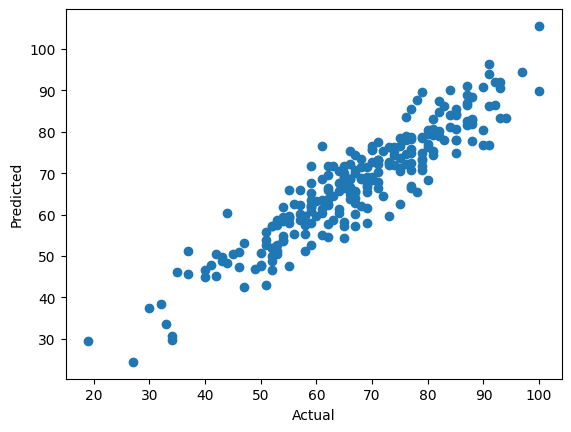

In [44]:

plt.scatter(y_test, y_pred) 
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

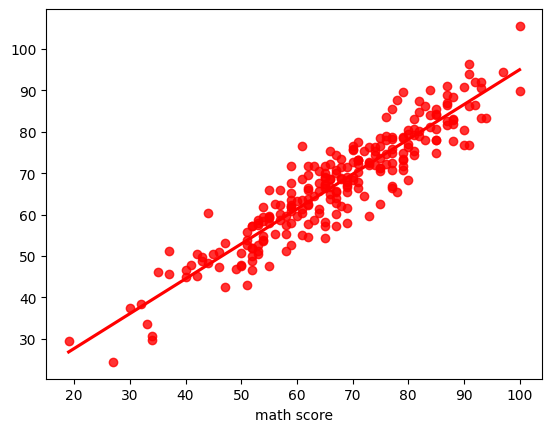

In [45]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

Difference between Actual and Predicted Values

In [46]:
pred_df = pd.DataFrame(
    {
        'Actual': y_test, 
        'Predicted': y_pred, 
        'Difference': y_test-y_pred
    }
)
pred_df

,Actual,Predicted,Difference
474,90,80.515625,9.484375
569,68,68.531250,-0.531250
364,59,65.343750,-6.343750
353,46,50.906250,-4.906250
710,93,90.718750,2.281250
...,...,...,...
801,76,77.921875,-1.921875
979,91,86.187500,4.812500
916,100,105.593750,-5.593750
682,62,62.515625,-0.515625
